In [1]:
import pandas as pd


### Step 1: Use the Python Pandas to read CSV file (2 marks)

In [2]:
stuDf=pd.read_csv("StudentsPerformance.csv")

### Step 2: Preview your loaded CSV data by showing first five rows of records. (2 marks)

In [3]:
stuDf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Step 3: Perform the value counts on the columns, “race/ethnicity”, “parental level of education”, and “lunch” to identify the frequency of each unique value in those columns (6 marks)


In [4]:
stuDf['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [5]:
stuDf['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [6]:
stuDf['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [7]:
stuDf['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [8]:
stuDf['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [9]:
stuDf['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

### Step 4: Create grouped bar chart to show the count of race/ethnicity and parental level of education grouped by gender. (6 marks)


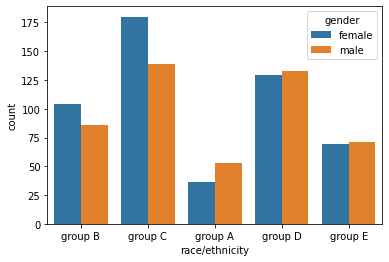

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='race/ethnicity', hue='gender', data=stuDf)
plt.show()

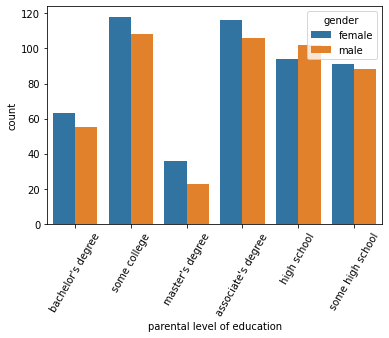

In [21]:
sns.countplot(x='parental level of education', hue='gender', data=stuDf)
plt.xticks(rotation=60)
plt.show()

### Step 5: Calculate the mean and median on math score, reading score and writing score. The mean and median of each score should be grouped by gender. (6 marks)

In [19]:
stuDf.groupby('gender')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [20]:
stuDf.groupby('gender')[['math score','reading score','writing score']].median()

,math score,reading score,writing score
gender,,,
female,65,73,74
male,69,66,64


### Step 6: By comparing the mean and median you obtained from Step 5, write a Python comment to talk about which is a better measure of center (mean or median) for the math, reading & writing score of this dataset? Please also include a reason to justify your answer. (2 marks)

In [22]:
# Based on the mean and median score of math, reading and writing that I obtained
# from Step 5, I think that median is a better measure of center for the math, reading
# and writing score of this dataset. 
# The reason is that a medain may reflect the middle score of the dataset, but mean is
# a average score of all the data, it can be affected by some very low value or very high
# value.

### Step 7: Create grouped bar chartsto show the mean of math score, reading score & writing score grouped by gender. (6 marks)

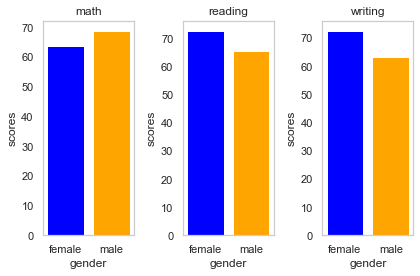

In [124]:

dff=stuDf[['math score','gender']].groupby('gender').mean()
dff1=stuDf[['reading score','gender']].groupby('gender').mean()
dff2=stuDf[['writing score','gender']].groupby('gender').mean()
fig, axs=plt.subplots(1,3)
axs[0].bar(dff.index, dff['math score'],color=['blue','orange'])
axs[1].bar(dff1.index, dff1['reading score'], color=['blue','orange'])
axs[2].bar(dff1.index, dff2['writing score'], color=['blue','orange'])

axs[0].set_ylabel('scores')
axs[0].set_title('math')
axs[0].set_xlabel('gender')
axs[0].grid(False)
axs[1].set_ylabel('scores')
axs[1].set_title('reading')
axs[1].set_xlabel('gender')
axs[1].grid(False)
axs[2].set_ylabel('scores')
axs[2].set_title('writing')
axs[2].set_xlabel('gender')
axs[2].grid(False)

fig.tight_layout()


### Step 8: Discuss your observation from the grouped bar charts produced from Step 7. (2 marks)

In [134]:
# From the grouped bar charts produced from Step 7, It can tell us that the female students get higher mean score in reading and writing.
# And the male students get higher mean score in math.


### Step 9: Pick and create one type of plot (e.g. grouped bar chart, box plots, or etc) to compare the performance of math, reading and writing score among the students with “completed” and “none” test preparation. (6 marks)

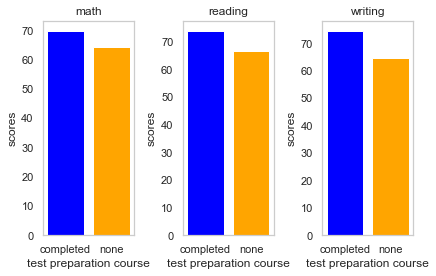

In [133]:
dff=stuDf[['math score','test preparation course']].groupby('test preparation course').mean()
dff1=stuDf[['reading score','test preparation course']].groupby('test preparation course').mean()
dff2=stuDf[['writing score','test preparation course']].groupby('test preparation course').mean()
fig, axs=plt.subplots(1,3)
axs[0].bar(dff.index, dff['math score'],color=['blue','orange'])
axs[1].bar(dff1.index, dff1['reading score'], color=['blue','orange'])
axs[2].bar(dff1.index, dff2['writing score'], color=['blue','orange'])

axs[0].set_ylabel('scores')
axs[0].set_title('math')
axs[0].set_xlabel('test preparation course')
axs[0].grid(False)
axs[1].set_ylabel('scores')
axs[1].set_title('reading')
axs[1].set_xlabel('test preparation course')
axs[1].grid(False)
axs[2].set_ylabel('scores')
axs[2].set_title('writing')
axs[2].set_xlabel('test preparation course')
axs[2].grid(False)

fig.tight_layout()

### Step 10: Based on the plot generated from Step 9, discuss your observations. (2 marks)

In [ ]:
# From the plot generated from Step 9, It tells us that the students who completed test preparation course, the mean of math score, reading score and 
# writing score are higher than the students who doesn't completed test prepartion course.

### Step 11: Store all the data extracted from the StudentsPerformance.csv in a relational database using the Python sqlite3 module. You will only require to create one table in your database. (5marks)

In [39]:
import sqlite3

conn = sqlite3.connect('stuPerfomance.db')

print ("database open success!")

database open success!


In [71]:
cur=conn.cursor()
drop_table="drop table if exists stuPerfomance;"
cur.execute(drop_table)
create_sql="""
create table stuPerfomance(
gender varchar(10),
race_ethnicity varchar(50),
parental_level_of_education varchar(30),
lunch varchar(20),
test_preparation_course varchar(20),
math_score int,
reading_score int,
writing_score int 
);
"""


cur.execute(create_sql)
conn.commit()


In [72]:
insert_sql="insert into stuPerfomance values(?,?,?,?,?,?,?,?) "
for i in range(len(stuDf)):
#     print([str(stuDf.loc[i][0]),  stuDf.loc[i][1], stuDf.loc[i][2], 
#                 stuDf.loc[i][3], stuDf.loc[i][4],  stuDf.loc[i][5], 
#                 stuDf.loc[i][6], stuDf.loc[i][7]])
    cur.execute(insert_sql, [stuDf.loc[i][0],  stuDf.loc[i][1], stuDf.loc[i][2], 
                stuDf.loc[i][3], stuDf.loc[i][4],  int(stuDf.loc[i][5]),                 
                int(stuDf.loc[i][6]), int(stuDf.loc[i][7])])
    

In [73]:
query_sql="select * from stuPerfomance"
cur.execute(query_sql)
print(cur.fetchall())

[('female', 'group B', "bachelor's degree", 'standard', 'none', 72, 72, 74), ('female', 'group C', 'some college', 'standard', 'completed', 69, 90, 88), ('female', 'group B', "master's degree", 'standard', 'none', 90, 95, 93), ('male', 'group A', "associate's degree", 'free/reduced', 'none', 47, 57, 44), ('male', 'group C', 'some college', 'standard', 'none', 76, 78, 75), ('female', 'group B', "associate's degree", 'standard', 'none', 71, 83, 78), ('female', 'group B', 'some college', 'standard', 'completed', 88, 95, 92), ('male', 'group B', 'some college', 'free/reduced', 'none', 40, 43, 39), ('male', 'group D', 'high school', 'free/reduced', 'completed', 64, 64, 67), ('female', 'group B', 'high school', 'free/reduced', 'none', 38, 60, 50), ('male', 'group C', "associate's degree", 'standard', 'none', 58, 54, 52), ('male', 'group D', "associate's degree", 'standard', 'none', 40, 52, 43), ('female', 'group B', 'high school', 'standard', 'none', 65, 81, 73), ('male', 'group A', 'some co

### Step 12: In your Python script, perform the following SQL queries on your dataset from the SQLite database .
#### Query 1: Select only the field of math score, reading score and writing score where the gender  is “female”. Limit your query results to only 5 records and print them out. (2 marks)
#### Query 3: Select only the field of math score, reading score and writing score where the test preparation is completed and the parental level of education is not “high school” and the lunch is “standard”. Limit your query results to only 5 records and print them out. (3 marks)

#### query1

In [75]:
sql="""select math_score, reading_score, writing_score
from stuPerfomance
where gender='female'
limit 5
"""
cur.execute(sql)
result=cur.fetchall()
for r in result:
    print(r)

(72, 72, 74)
(69, 90, 88)
(90, 95, 93)
(71, 83, 78)
(88, 95, 92)


#### query3

In [78]:
sql="""select math_score, reading_score, writing_score
from stuPerfomance
where test_preparation_course='completed' 
and parental_level_of_education!='high school'
and lunch='standard'
limit 5
"""
cur.execute(sql)
result=cur.fetchall()
for r in result:
    print(r)

(69, 90, 88)
(88, 95, 92)
(78, 72, 70)
(81, 81, 79)
(55, 65, 62)


In [135]:
conn.close()

In [12]:
df=stuDf.groupby('gender')['race/ethnicity']
df

In [130]:
dff=stuDf[['race/ethnicity','gender']].groupby(['race/ethnicity']).count()
dff

,gender
race/ethnicity,
group A,89
group B,190
group C,319
group D,262
group E,140


In [ ]:
df.values
df.index[0]

In [ ]:
# df1=pd.DataFrame({df.index[1]:df.values},index=df.index[0])


ax=df.plot.bar()
# df1
# ax=df1.plot.bar(rot=0)

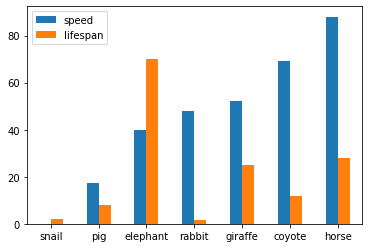

In [24]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

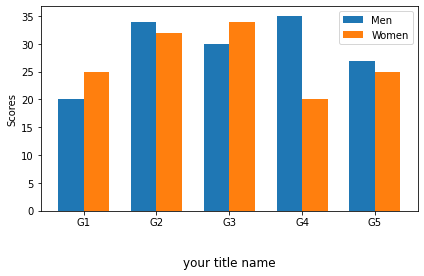

In [23]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()
plt.title("your title name", y=-0.3)

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

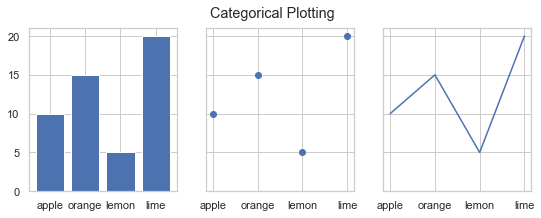

In [88]:
import matplotlib.pyplot as plt

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')




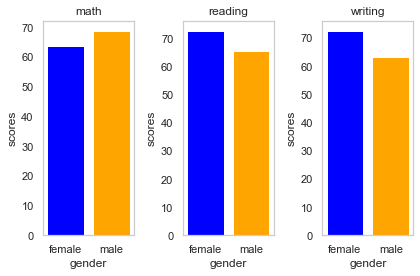

In [123]:

dff=stuDf[['math score','gender']].groupby('gender').mean()
dff1=stuDf[['reading score','gender']].groupby('gender').mean()
dff2=stuDf[['writing score','gender']].groupby('gender').mean()
fig, axs=plt.subplots(1,3)
axs[0].bar(dff.index, dff['math score'],color=['blue','orange'])
axs[1].bar(dff1.index, dff1['reading score'], color=['blue','orange'])
axs[2].bar(dff1.index, dff2['writing score'], color=['blue','orange'])

axs[0].set_ylabel('scores')
axs[0].set_title('math')
axs[0].set_xlabel('gender')
axs[0].grid(False)
axs[1].set_ylabel('scores')
axs[1].set_title('reading')
axs[1].set_xlabel('gender')
axs[1].grid(False)
axs[2].set_ylabel('scores')
axs[2].set_title('writing')
axs[2].set_xlabel('gender')
axs[2].grid(False)

fig.tight_layout()
